# Perceptrón

Ahora, vamos a poner en práctica lo aprendido implementando un perceptrón desde cero y aplicándolo a un problema real.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

Una desventaja de los modelos de deep learning, es que requieren muchos, **MUCHOS** datos para entrenar.

En este caso, vamos a generar datos linealmente separables.

In [5]:
# Número de muestras por clase
n_samples_per_class = 5000

# Generamos datos para la clase 0
mean0 = [0.5, 0.5]
cov0 = [[1.0, 0], [0, 1.0]]
X0 = np.random.multivariate_normal(mean0, cov0, n_samples_per_class)
y0 = np.zeros(n_samples_per_class)

# Generamos datos para la clase 1
mean1 = [4.5, 4.5]
cov1 = [[1.0, 0], [0, 1.0]]
X1 = np.random.multivariate_normal(mean1, cov1, n_samples_per_class)
y1 = np.ones(n_samples_per_class)

# Combinamos los datos
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

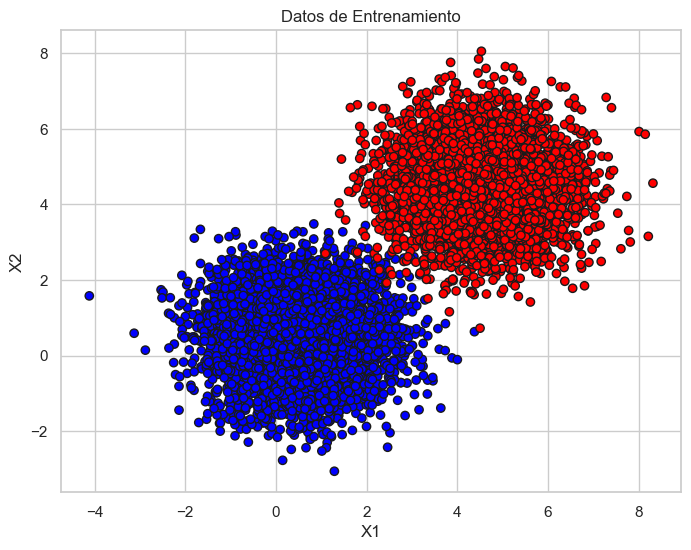

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Entrenamiento')
plt.show()

In [9]:
class Perceptron:
    def __init__(self, alpha=0.1, n_iter=10):
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # Inicializar pesos y sesgo
        self.w_ = np.zeros(X.shape[1])
        self.b_ = 0
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # Calcular salida predicha
                z = np.dot(xi, self.w_) + self.b_
                y_pred = 1 if z >= 0 else 0
                
                # Calcular actualización
                update = self.alpha * (target - y_pred)
                
                # Actualizar pesos y sesgo
                self.w_ += update * xi
                self.b_ += update
                
                # Contar errores
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X):
        z = np.dot(X, self.w_) + self.b_
        return np.where(z >= 0, 1, 0)


In [40]:
# Crear instancia del perceptrón
ppn = Perceptron(alpha=0.001, n_iter=15)

# Entrenar el modelo
ppn.fit(X, y)

Una **época** o **número de iteraciónes**, se refiere a una pasada completa por todo el conjunto de datos de entrenamiento. Es decir, cuando el algoritmo ha procesado cada muestra de entrenamiento una vez, se considera que ha completado una época.

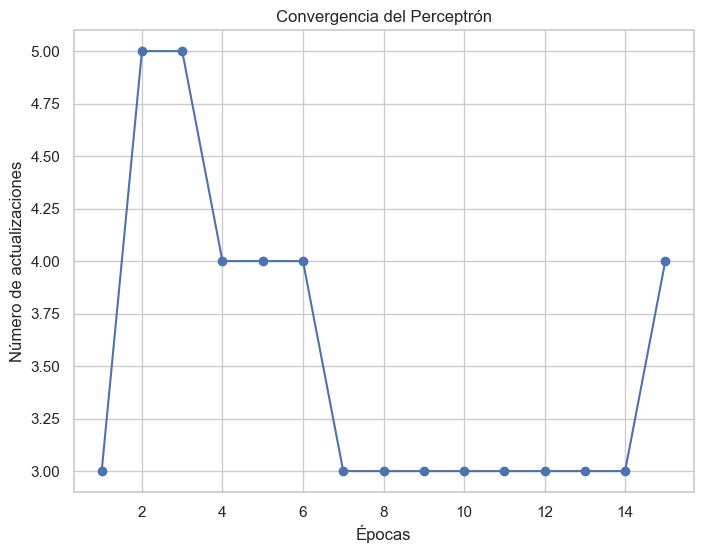

In [42]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Convergencia del Perceptrón')
plt.show()


Revisemos ahora cómo se separan los datos graficamente

C:\Users\felip\AppData\Local\Temp\ipykernel_5168\2115582159.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


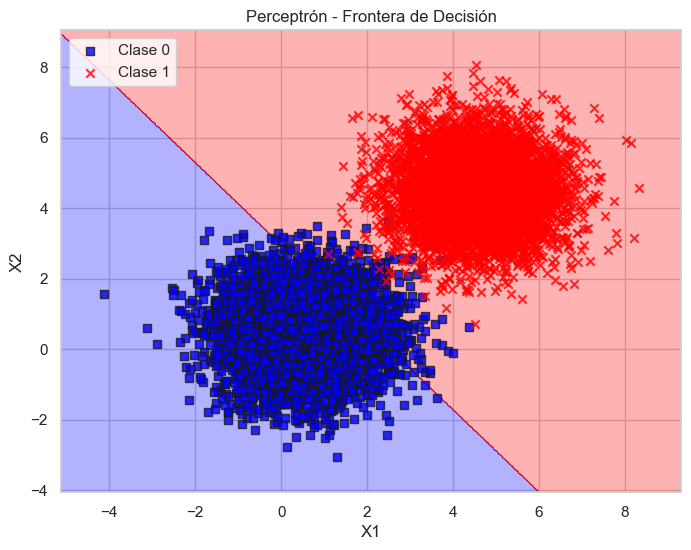

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors)
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Clase {int(cl)}',
                    edgecolor='k')

plt.figure(figsize=(8,6))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptrón - Frontera de Decisión')
plt.legend(loc='upper left')
plt.show()


¿Qué pasa si los datos no son linealmente separables?

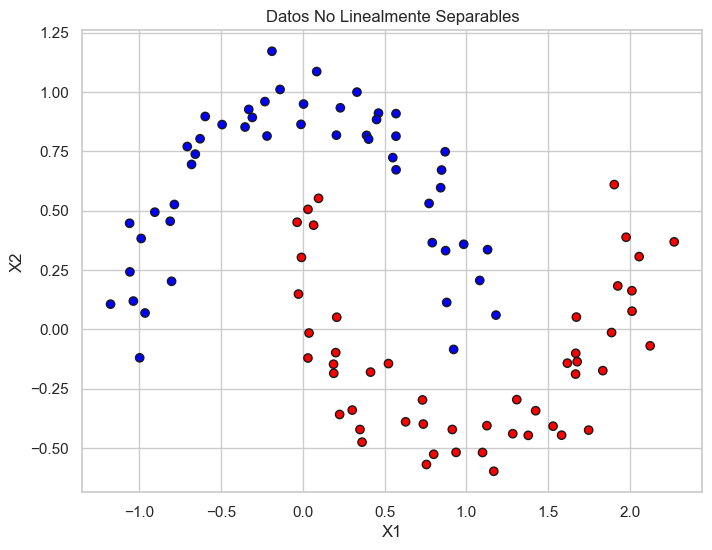

In [49]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=42)

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_moons[:,0], X_moons[:,1], c=y_moons, cmap='bwr', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos No Linealmente Separables')
plt.show()


In [51]:
# Crear instancia del perceptrón
ppn_moons = Perceptron(alpha=0.001, n_iter=15)

# Entrenar el modelo
ppn_moons.fit(X_moons, y_moons)

C:\Users\felip\AppData\Local\Temp\ipykernel_5168\2115582159.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


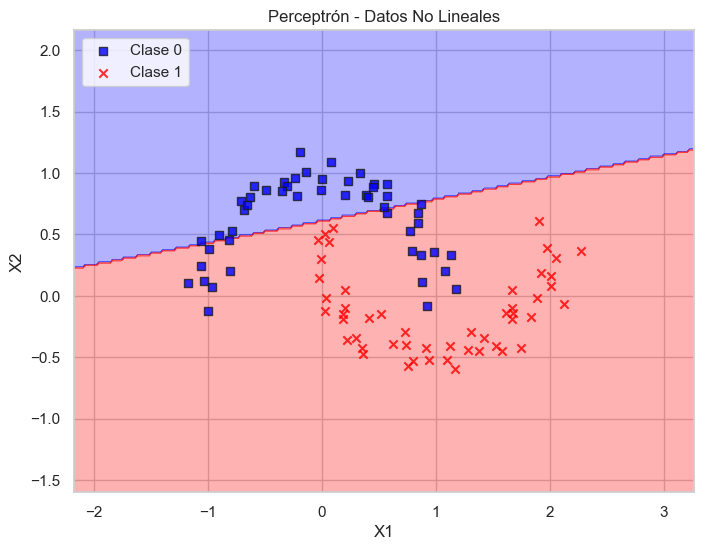

In [53]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_moons, y_moons, classifier=ppn_moons)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptrón - Datos No Lineales')
plt.legend(loc='upper left')
plt.show()
